##Twitter Sentiment Analysis

In [ ]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from statsmodels.stats.proportion import proportions_ztest
import plotly.express as px

# Set visual theme for seaborn charts
sns.set(style='whitegrid')

In [ ]:
# Load the raw dataset

df = pd.read_csv('twitter_training.csv', header=None, names=['tweet_id', 'entity', 'sentiment', 'text'])
df.head()

,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.dtypes

,0
tweet_id,int64
entity,object
sentiment,object
text,object


In [ ]:
# Find and remove rows with '<unk>' tokens (unknown/invalid tokens)

df[df['text'].str.contains("<unk>", na=False)]

,tweet_id,entity,sentiment,text
41,2407,Borderlands,Negative,<unk> Gearbox really time to fix this 10 drops...
47,2408,Borderlands,Neutral,Check<unk> this epic streamer!.
57,2410,Borderlands,Negative,why does like<unk> man in borderlands have sli...
87,2415,Borderlands,Positive,FUCK YESSSSSSSS<unk>
131,2422,Borderlands,Irrelevant,do these new @GhostLifestyle<unk> They want dr...
...,...,...,...,...
74583,9184,Nvidia,Neutral,Think im gon screw around with this Nvidia bro...
74603,9187,Nvidia,Positive,<unk> By YouTube: Tips to Put Nvidia Camera on...
74631,9192,Nvidia,Neutral,Save $500 buying the AERO 15 OLED - Award winn...
74655,9196,Nvidia,Negative,Cheap will mean better<unk>!.. techsall.com/go...


In [ ]:
df = df[~df['text'].str.contains("<unk>", na=False)]

In [ ]:
df[df['text'].str.contains("<unk>", na=False)]

,tweet_id,entity,sentiment,text


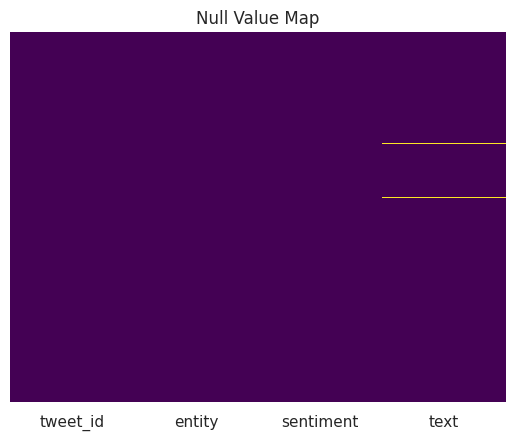

In [ ]:
# Check nulls
df.isnull().sum()

# (Optional) Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Null Value Map")
plt.show()

In [ ]:
# Remove duplicate rows and null values

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df['sentiment'].value_counts()

,count
sentiment,
Negative,21014
Positive,19110
Neutral,17047
Irrelevant,12076


In [ ]:
df['length'] = df['text'].apply(len)
df['length'].describe()

,length
count,69247.000000
mean,110.474086
std,79.343490
min,1.000000
25%,49.000000
50%,93.000000
75%,154.000000
max,957.000000


In [ ]:
top_entities = df['entity'].value_counts().head(10)

top_entities

,count
entity,
TomClancysRainbowSix,2265
Microsoft,2243
MaddenNFL,2240
Verizon,2226
CallOfDuty,2225
LeagueOfLegends,2221
WorldOfCraft,2215
TomClancysGhostRecon,2207
Facebook,2207


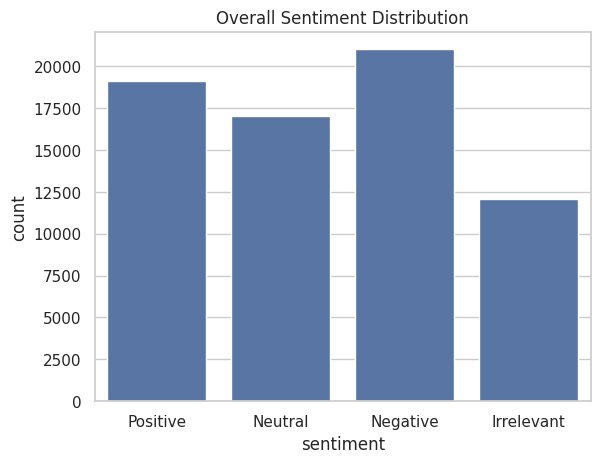

In [ ]:
# Plot overall sentiment distribution across all tweets

sns.countplot(x='sentiment', data=df)
plt.title('Overall Sentiment Distribution')
plt.show()

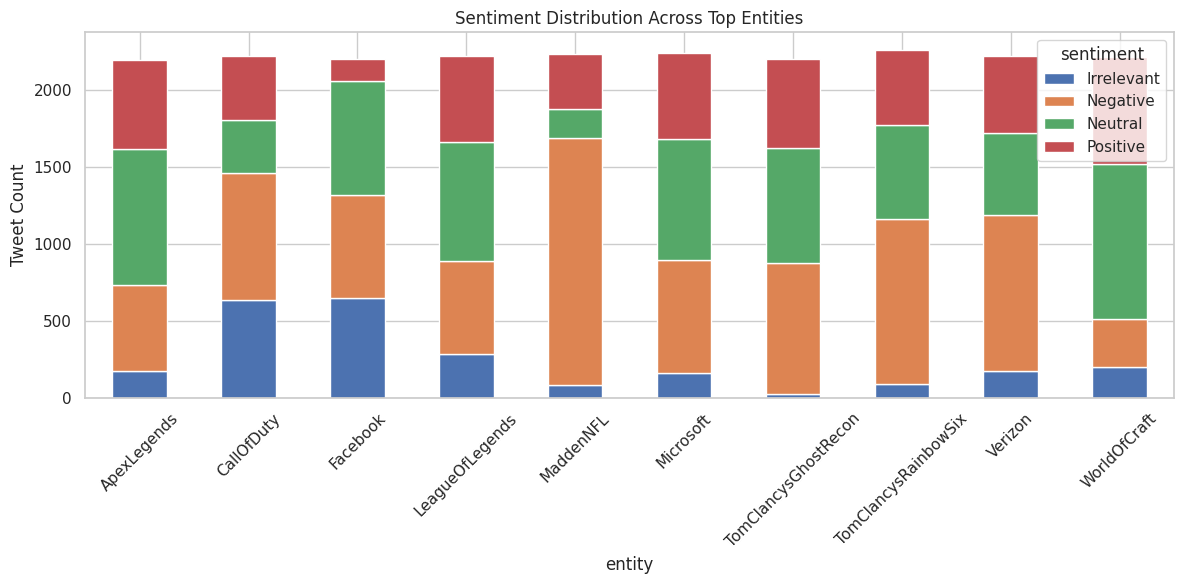

In [ ]:
# Create a stacked bar chart: sentiment distribution per top entity

df_top_entities = df[df['entity'].isin(top_entities.index)]
sentiment_by_entity = pd.crosstab(df_top_entities['entity'], df_top_entities['sentiment'])

# Plot
sentiment_by_entity.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Sentiment Distribution Across Top Entities")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

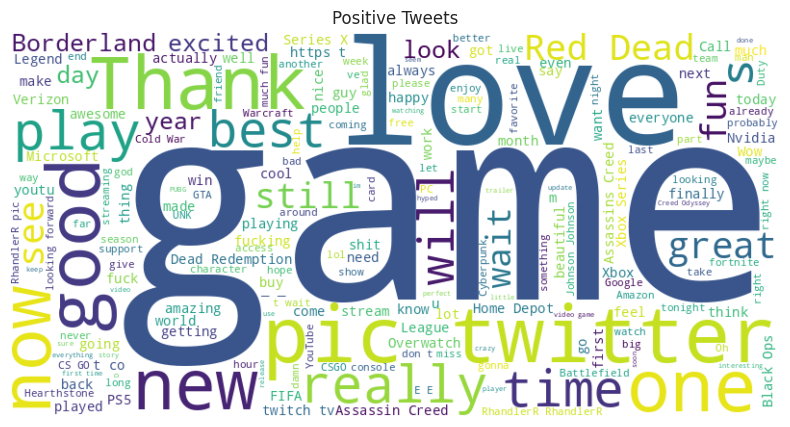

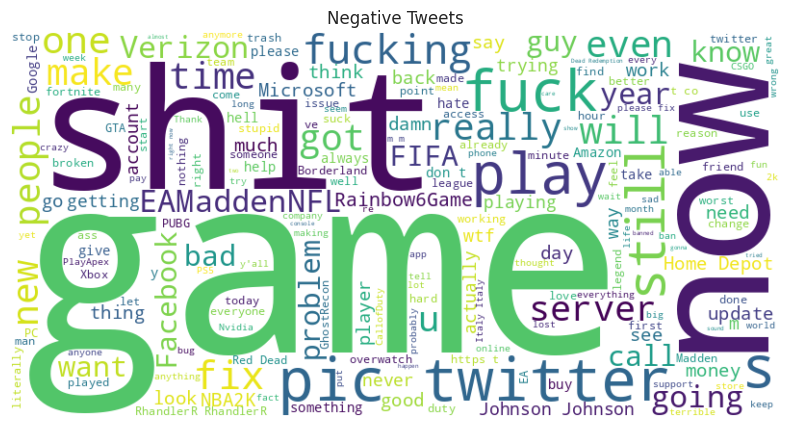

In [ ]:
# Word cloud generator function (no stopwords removal yet)

def plot_wordcloud(data, title):
    text = ' '.join(data)
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_wordcloud(df[df['sentiment'] == 'Positive']['text'], 'Positive Tweets')
plot_wordcloud(df[df['sentiment'] == 'Negative']['text'], 'Negative Tweets')

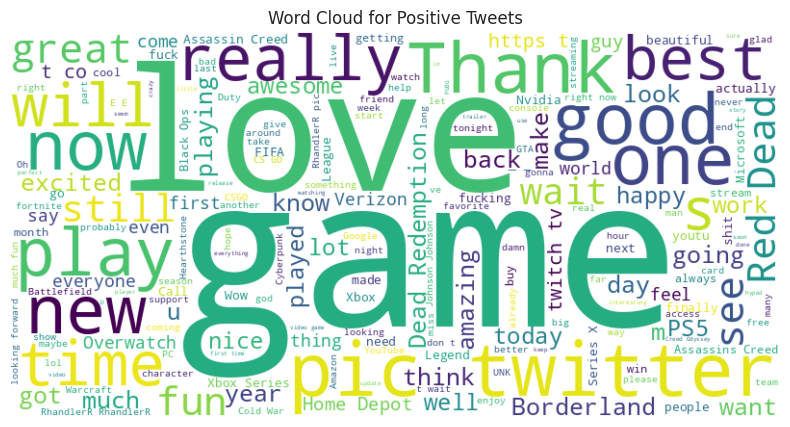

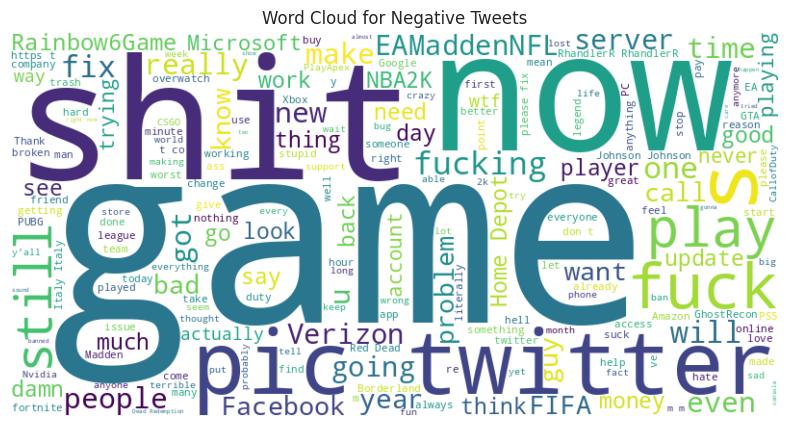

In [ ]:
# Word cloud function with stopwords removed (cleaner results)

from wordcloud import STOPWORDS

def plot_wordcloud(sentiment_label):
    text = ' '.join(df[df['sentiment'] == sentiment_label]['text'])
    stopwords = set(STOPWORDS)
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=stopwords
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment_label} Tweets")
    plt.show()

plot_wordcloud("Positive")
plot_wordcloud("Negative")

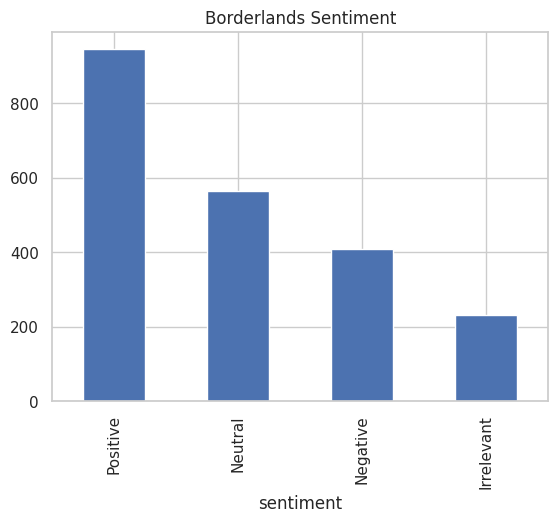

In [ ]:
# Deep dive: analyze sentiment specifically for 'Borderlands' entity

borderlands = df[df['entity'] == 'Borderlands']
borderlands['sentiment'].value_counts().plot(kind='bar')
plt.title('Borderlands Sentiment')
plt.show()

In [ ]:
# Perform Z-Test to statistically check if negative sentiment > positive

neg = (borderlands['sentiment'] == 'Negative').sum()
pos = (borderlands['sentiment'] == 'Positive').sum()
total = len(borderlands)

count = [neg, pos]
nobs = [total, total]

z_stat, p_val = proportions_ztest(count, nobs, alternative='larger')

print(f'Z-Score: {z_stat:.2f}')
print(f'p-value: {p_val:.4f}')

if p_val < 0.05:
    print('Conclusion: Negative sentiment is significantly higher than Positive.')
else:
    print('Conclusion: No significant difference.')

Z-Score: -17.61
p-value: 1.0000
Conclusion: No significant difference.


In [ ]:
df = df[df['text'].apply(lambda x: isinstance(x, str))]

df['length'] = df['text'].apply(len)

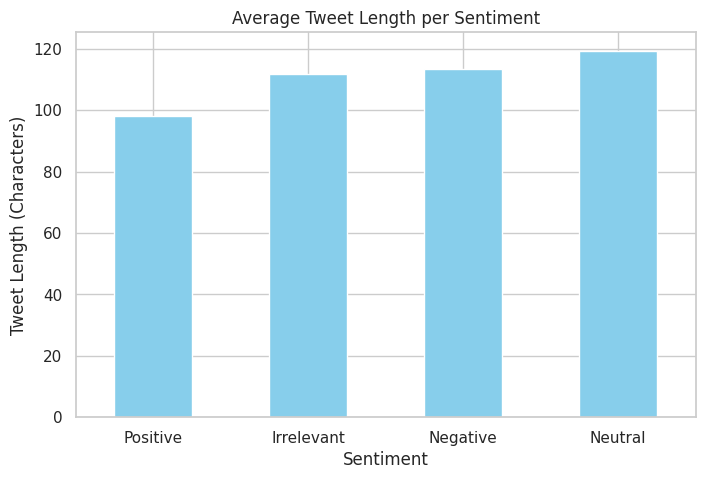

In [ ]:
# Mean length per sentiment
avg_length = df.groupby('sentiment')['length'].mean().sort_values()

# Plot it
avg_length.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Average Tweet Length per Sentiment")
plt.ylabel("Tweet Length (Characters)")
plt.xlabel("Sentiment")
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Save Cleaned Data for Streamlit
df.to_csv('cleaned_twitter_sentiment.csv', index=False)